<a href="https://colab.research.google.com/github/amnaahmad20/Decision-trees-Penguin-dataset/blob/main/Penguins_dataset_classification_and_visulaization_using_decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **penguins dataset clasification**

## Workings Of Decision Tree
* At the root node decision tree selects feature to split the data in two major categories.
* So at the end of root node we have two decision rules and two sub trees
* Data will again be divided in two categories in each sub tree
* This process will continue until every training example is grouped together.
* So at the end of decision tree we end up with leaf node. Which represent the class or a continuous value that we are trying predict

## Criteria To Split The Data
The objective of decision tree is to split the data in such a way that at the end we have different groups of data which has more similarity and less randomness/impurity. In order to achieve this, every split in decision tree must reduce the randomness.
Decision tree uses 'entropy' or 'gini' selection criteria to split the data.
Note: We are going to use sklearn library to test classification. 'entropy' or 'gini' are selection criteria for classifier.

```
    Information Gain= Entropy(Parent Decision Node)–(Average Entropy(Child Nodes))
```


# Advantages Of Decision Tree
* Simple to understand and to interpret. Trees can be visualized.
* Requires little data preparation. Other techniques often require data normalization, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.
* Able to handle both numerical and categorical data.
* Able to handle multi-output problems.
* Uses a white box model. Results are easy to interpret.
* Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.

# Disadvantages Of Decision Tree
* Decision-tree learners can create over-complex trees that do not generalize the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
* Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.
* Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

# Classification Problem Example
For classification exercise we are going to use penguins dataset


## Import Libraries

In [1]:
import pandas as pd #for data manipulation and analysis 
import numpy as np #for manipulating arrays
from sklearn import datasets #get iris dataset
from sklearn import model_selection #Split arrays into random train and test subsets
from sklearn import tree #for decision tree 
import matplotlib.pyplot as plt #for plotting graph
#to make matplotlib plots appear directly below the cell in which the plot function is called
%matplotlib inline 
import graphviz #to make decision tree

## Load The Data

In [2]:
df = pd.read_csv("/content/penguins.csv.xls").dropna().drop(columns="Unnamed: 0")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [3]:
#Print the shape of the data using the shape attribute
#printing data frame to check the data
print(df)

# using dataframe.shape function printing the rows and columns of the iris dataset
print("Shape of the data frame:")
print(df.shape)

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0  

### View summary of dataset

In [5]:
#Print the overall summary of the dataset using pandas info method

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


In [6]:
##check the distribution of species in the data using panadas value_count method. 

df.value_counts(ascending = True)

species  island     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex     year
Adelie   Biscoe     34.5            18.1           187.0              2900.0       female  2008    1
Gentoo   Biscoe     43.5            14.2           220.0              4700.0       female  2008    1
                    43.4            14.4           218.0              4600.0       female  2009    1
                    43.3            14.0           208.0              4575.0       female  2009    1
                                    13.4           209.0              4400.0       female  2007    1
                                                                                                  ..
Adelie   Torgersen  35.9            16.6           190.0              3050.0       female  2008    1
                    35.7            17.0           189.0              3350.0       female  2009    1
                    35.5            17.5           190.0              3700.0       female  2008 

In [7]:
#Check whether the data contains any missing vakues or not, by using the panadas dataframe isnull method. 
# displaying the total num of null values in the dataset
df.isnull().values.any()

#displaying sum of null values
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

## Build Machine Learning Model

In [9]:
#Lets create feature matrix X  and y labels
X= df.drop(['species'], axis=1)
y = df['species']

print('X shape=', X.shape)
print('y shape=', y.shape)

X shape= (333, 7)
y shape= (333,)


### Create Test And Train Dataset
* We will split the dataset, so that we can use one set of data for training the model and one set of data for testing the model


In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('X_train dimension= ', X_train.shape)
print('X_test dimension= ', X_test.shape)
print('y_train dimension= ', y_train.shape)
print('y_train dimension= ', y_test.shape)

X_train dimension=  (223, 7)
X_test dimension=  (110, 7)
y_train dimension=  (223,)
y_train dimension=  (110,)


In [11]:
X_test.reset_index(drop=True)
y_test.reset_index(drop=True)
X_test.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
30,Dream,39.5,16.7,178.0,3250.0,female,2007
320,Dream,50.9,17.9,196.0,3675.0,female,2009
79,Torgersen,42.1,19.1,195.0,4000.0,male,2008
202,Biscoe,46.6,14.2,210.0,4850.0,female,2008
63,Biscoe,41.1,18.2,192.0,4050.0,male,2008


In [12]:
X_train.reset_index(drop=True)
y_train.reset_index(drop=True)
X_train.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
44,Dream,37.0,16.9,185.0,3000.0,female,2007
321,Dream,50.8,18.5,201.0,4450.0,male,2009
110,Biscoe,38.1,16.5,198.0,3825.0,female,2009
161,Biscoe,46.8,15.4,215.0,5150.0,male,2007
200,Biscoe,44.9,13.3,213.0,5100.0,female,2008


In [19]:
!pip install category_encoders



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 1.9 MB/s eta 0:00:00


In [20]:
import category_encoders as  ce
# defying a function to clean the data 
def tratamento(df):
    #https://www.youtube.com/watch?v=CGMhil6obDA
    encoder = ce.OneHotEncoder(cols = 'island',use_cat_names=True)
    df = encoder.fit_transform(df)
    df['sex'] = np.where(df['sex']== 'FEMALE',1,0)
    df = df.fillna(0)
    
    return df 

In [21]:
x_train_tra =tratamento(X_train)

Now lets train the model using Decision Tree

In [25]:
"""
To obtain a deterministic behaviour during fitting always set value for 'random_state' attribute
Also note that default value of criteria to split the data is 'gini'
You are reuesyed to use 'entropy' criteria in the lab
"""
cls = tree.DecisionTreeClassifier(criterion='entropy')
estimator=cls.fit(x_train_tra,y_train)

#Fit the model using the fit method. 
# Predict Accuracy Score
y_pred = cls.predict(x_train_tra)

In [26]:
x_train_tra.head()

,island_Dream,island_Biscoe,island_Torgersen,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
44,1,0,0,37.0,16.9,185.0,3000.0,0,2007
321,1,0,0,50.8,18.5,201.0,4450.0,0,2009
110,0,1,0,38.1,16.5,198.0,3825.0,0,2009
161,0,1,0,46.8,15.4,215.0,5150.0,0,2007
200,0,1,0,44.9,13.3,213.0,5100.0,0,2008


In [30]:
prediction= cls.predict(x_train_tra)
print(prediction[10])
print(prediction[20])
print(prediction[29])

print(y_test) # to check that 


Adelie
Adelie
Adelie
30        Adelie
320    Chinstrap
79        Adelie
202       Gentoo
63        Adelie
         ...    
15        Adelie
233       Gentoo
235       Gentoo
87        Adelie
159       Gentoo
Name: species, Length: 110, dtype: object


In [35]:
predicted = cls.predict(x_train_tra)
expected = list(y_test)

data=[]
from tabulate import tabulate
for i in range(len(y_test)):
  data.append([i,predicted[i],expected[i]])

print (data)
#print(tabulate([data], headers=['value','predicted', 'expected'], tablefmt='orgtbl'))
# predicting and printing data

# create header
head = ["value ", "expected","predicted"]
 
# display table
print(tabulate(data, headers=head, tablefmt="grid"))


[[0, 'Adelie', 'Adelie'], [1, 'Chinstrap', 'Chinstrap'], [2, 'Adelie', 'Adelie'], [3, 'Gentoo', 'Gentoo'], [4, 'Gentoo', 'Adelie'], [5, 'Gentoo', 'Chinstrap'], [6, 'Adelie', 'Chinstrap'], [7, 'Gentoo', 'Gentoo'], [8, 'Adelie', 'Gentoo'], [9, 'Gentoo', 'Gentoo'], [10, 'Adelie', 'Adelie'], [11, 'Gentoo', 'Adelie'], [12, 'Chinstrap', 'Chinstrap'], [13, 'Adelie', 'Adelie'], [14, 'Adelie', 'Chinstrap'], [15, 'Chinstrap', 'Adelie'], [16, 'Adelie', 'Adelie'], [17, 'Adelie', 'Gentoo'], [18, 'Adelie', 'Adelie'], [19, 'Gentoo', 'Chinstrap'], [20, 'Adelie', 'Adelie'], [21, 'Adelie', 'Adelie'], [22, 'Gentoo', 'Chinstrap'], [23, 'Adelie', 'Gentoo'], [24, 'Adelie', 'Adelie'], [25, 'Adelie', 'Adelie'], [26, 'Gentoo', 'Gentoo'], [27, 'Adelie', 'Chinstrap'], [28, 'Chinstrap', 'Gentoo'], [29, 'Adelie', 'Chinstrap'], [30, 'Adelie', 'Gentoo'], [31, 'Gentoo', 'Chinstrap'], [32, 'Adelie', 'Adelie'], [33, 'Chinstrap', 'Adelie'], [34, 'Gentoo', 'Chinstrap'], [35, 'Chinstrap', 'Chinstrap'], [36, 'Gentoo', 'Gen

In [41]:
x_test = tratamento(X_test)
# Organizing the columns in the same order as the training data 
x_test = x_test.loc[:,x_train_tra.columns]
x_test.head()

,island_Dream,island_Biscoe,island_Torgersen,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
30,1,0,0,39.5,16.7,178.0,3250.0,0,2007
320,1,0,0,50.9,17.9,196.0,3675.0,0,2009
79,0,0,1,42.1,19.1,195.0,4000.0,0,2008
202,0,1,0,46.6,14.2,210.0,4850.0,0,2008
63,0,1,0,41.1,18.2,192.0,4050.0,0,2008


In [43]:
y_pred = cls.predict(x_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


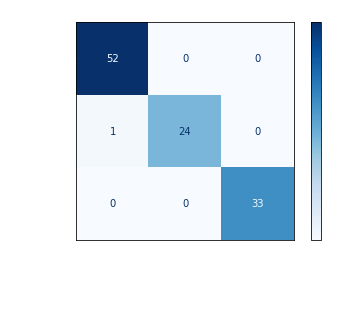

In [46]:
from sklearn import metrics 
color = 'white'
matrix = metrics.plot_confusion_matrix(cls, x_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.xticks(rotation=90)
plt.show()

### Model Score
Check the model score using test data

In [47]:
#Check model accuracy using the score method.
from sklearn.metrics import accuracy_score
print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred=cls.predict(x_train_tra)))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))


Train data accuracy: 1.0
Accuracy: 0.990909090909091
              precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        52
   Chinstrap       1.00      0.96      0.98        25
      Gentoo       1.00      1.00      1.00        33

    accuracy                           0.99       110
   macro avg       0.99      0.99      0.99       110
weighted avg       0.99      0.99      0.99       110



## Visualize The Decision Tree
We will use plot_tree() function from sklearn to plot the tree and then export the tree in Graphviz format using the export_graphviz exporter. Results will be saved in iris_decision_tree.pdf file

[Text(0.578125, 0.9166666666666666, 'X[5] <= 207.5\nentropy = 1.513\nsamples = 223\nvalue = [94, 43, 86]'),
 Text(0.34375, 0.75, 'X[3] <= 43.15\nentropy = 0.942\nsamples = 133\nvalue = [92, 40, 1]'),
 Text(0.125, 0.5833333333333334, 'X[3] <= 42.35\nentropy = 0.09\nsamples = 88\nvalue = [87, 1, 0]'),
 Text(0.0625, 0.4166666666666667, 'entropy = 0.0\nsamples = 84\nvalue = [84, 0, 0]'),
 Text(0.1875, 0.4166666666666667, 'X[0] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1, 0]'),
 Text(0.125, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.5625, 0.5833333333333334, 'X[0] <= 0.5\nentropy = 0.653\nsamples = 45\nvalue = [5, 39, 1]'),
 Text(0.4375, 0.4166666666666667, 'X[4] <= 16.65\nentropy = 0.722\nsamples = 5\nvalue = [4, 0, 1]'),
 Text(0.375, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.5, 0.25, 'entropy = 0.0\nsamples = 4\nvalue = [4, 0, 0]'),
 Text(0.6875, 0.4166666666666667, 'X[3]

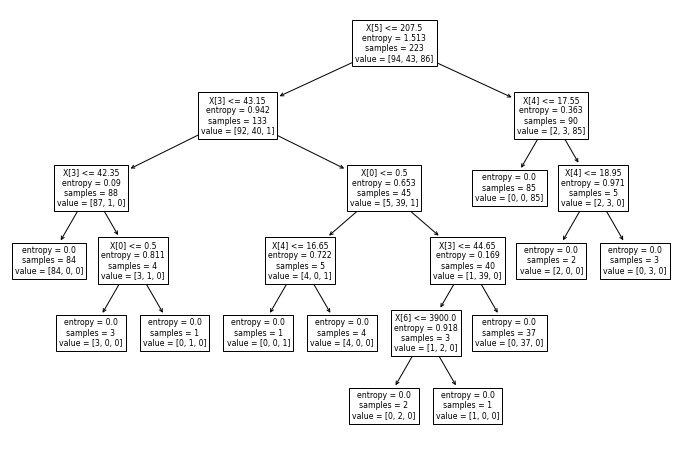

In [37]:
plt.figure(figsize=(12,8))
tree.plot_tree(cls) 

In [38]:
dot_data = tree.export_graphviz(cls, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("_decision_tree") 

'_decision_tree.pdf'

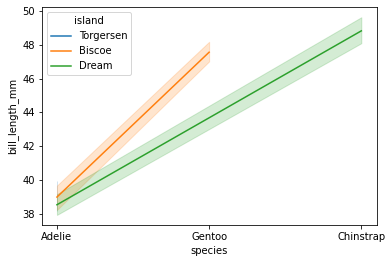

In [49]:
import seaborn as sns
fig = sns.lineplot(data=df, x="species", 
             y="bill_length_mm", 
             hue='island') 

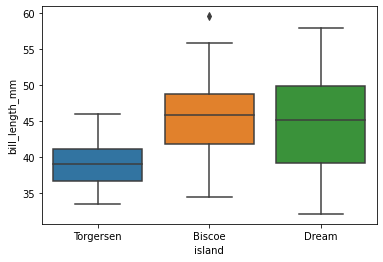

In [50]:
sns.boxplot(data=df,y = 'bill_length_mm',x = 'island')

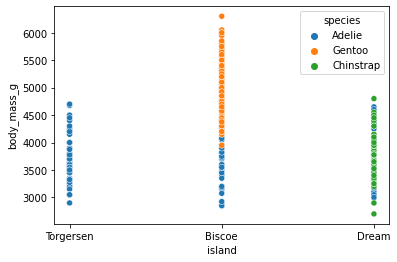

In [53]:
sns.scatterplot(data=df,x='island',y='body_mass_g',hue='species')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


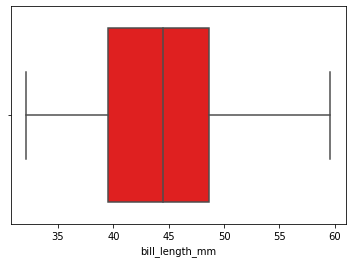

In [57]:
sns.boxplot(df['bill_length_mm'],color = 'red')